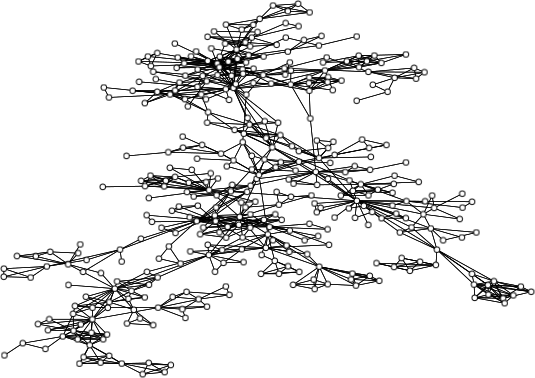

In [44]:
using PyPlot
include("utils.jl")
using DiffusionTutorialUtilities
utils = DiffusionTutorialUtilities
A,xy = utils.load_graph_and_coords("newman-netsci")
utils.cgraphplot(A,xy,filled=false)

In [34]:
include("diffusions.jl")
using DiffusionAlgorithms
P = utils.normout!(A)

379x379 sparse matrix with 1828 Float64 entries:
	[2  ,   1]  =  0.5
	[3  ,   1]  =  0.5
	[4  ,   1]  =  0.0294118
	[5  ,   1]  =  0.037037
	[16 ,   1]  =  0.047619
	[44 ,   1]  =  0.25
	[113,   1]  =  0.0666667
	[131,   1]  =  0.0833333
	[250,   1]  =  0.166667
	[259,   1]  =  0.333333
	⋮
	[375, 376]  =  0.333333
	[377, 376]  =  0.333333
	[207, 377]  =  0.2
	[375, 377]  =  0.333333
	[376, 377]  =  0.333333
	[70 , 378]  =  0.0555556
	[303, 378]  =  0.0833333
	[379, 378]  =  0.333333
	[70 , 379]  =  0.0555556
	[303, 379]  =  0.0833333
	[378, 379]  =  0.333333

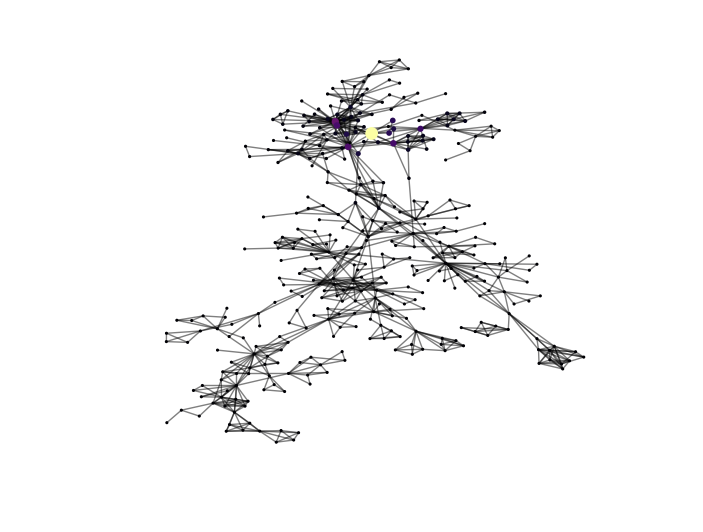

PyObject <matplotlib.collections.PathCollection object at 0x3243ea710>

In [35]:
function single_seed_pagerank(P,alpha,seed)
    n = size(P,1)
    @assert 1 <= seed <= n
    v = zeros(size(P,1))
    v[seed] = (1.-alpha)
    x = (eye(n) - alpha*P') \ v
end
x = single_seed_pagerank(P,0.85,1)
utils.graphplot(A,xy)
scatter(xy[:,1],xy[:,2],400*x+5,400*x,edgecolor="None",cmap="inferno")
#axis("off")
#colorbar()


In [36]:
using Interact

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.49,"alpha",0.49,0.0:0.01:0.99)

Interact.Slider{Int64}([Reactive.Input{Int64}] 190,"seed",190,1:379)

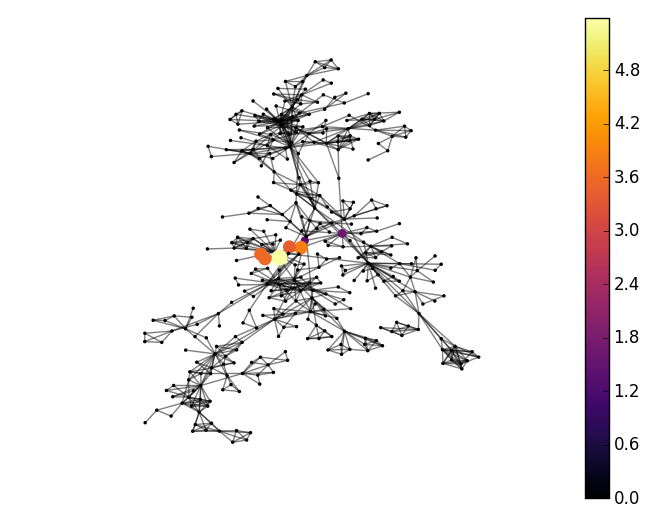

In [37]:
n = size(P,1)
f = figure()
@manipulate for alpha=0:0.01:0.99, seed=1:n; withfig(f) do
        x = single_seed_pagerank(P,alpha,seed)
        utils.graphplot(A,xy)
        scatter(xy[:,1],xy[:,2],25*max(log(n*x),0.25),max(log(n*x),0),edgecolor="None",cmap="inferno")
        axis("off")
        colorbar()
        #clim([0,sqrt(n)])
    end   
end    

In [38]:
close("all")

Interact.Options{:ToggleButtons,Float64}([Reactive.Input{Float64}] 0.999,"alpha",0.999,"0.999",Interact.OptionDict(Any["0.999","0.995","0.99","0.95","0.9","0.85","0.8","0.75","0.66","0.5","0.25","0.1"],Dict{Any,Any}("0.99"=>0.99,"0.95"=>0.95,"0.9"=>0.9,"0.8"=>0.8,"0.25"=>0.25,"0.75"=>0.75,"0.66"=>0.66,"0.85"=>0.85,"0.5"=>0.5,"0.1"=>0.1,"0.995"=>0.995,"0.999"=>0.999)),Any[],Any[])

Interact.Slider{Int64}([Reactive.Input{Int64}] 190,"seed",190,1:379)

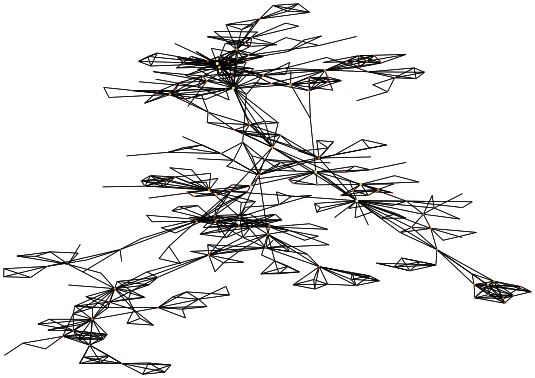

0.143544 seconds (39.54 k allocations: 1.836 MB)


In [45]:
include("diffusions.jl")
include("utils.jl")
using DiffusionAlgorithms
using DiffusionTutorialUtilities

A,xy = utils.load_graph_and_coords("newman-netsci");
P = utils.normout!(A)
n = size(P,1)
# chebyshev point set of alphas
N=15; alphas = [0.999,0.995,0.99,0.95,0.9,0.85,0.8,0.75,0.66,0.5,0.25,0.1]
@manipulate for alpha=alphas, seed=1:n
    @time x = DiffusionAlgorithms.single_seed_pagerank_power(P',alpha,seed)
    #utils.cgraphplot(A,xy,0.33*max(log(n*x),0.75),max(log(n*x),0),utils._inferno_data)
    utils.cgraphplot(A,xy,0.1*log(1/(max(minimum(x),1.e-12))*x),log(x+1.e-12),
        utils._inferno_data)

end   

Interact.Options{:ToggleButtons,Float64}([Reactive.Input{Float64}] 0.999,"alpha",0.999,"0.999",Interact.OptionDict(Any["0.999","0.995","0.99","0.95","0.9","0.85","0.8","0.75","0.66","0.5","0.25","0.1"],Dict{Any,Any}("0.99"=>0.99,"0.95"=>0.95,"0.9"=>0.9,"0.8"=>0.8,"0.25"=>0.25,"0.75"=>0.75,"0.66"=>0.66,"0.85"=>0.85,"0.5"=>0.5,"0.1"=>0.1,"0.995"=>0.995,"0.999"=>0.999)),Any[],Any[])

Interact.Slider{Int64}([Reactive.Input{Int64}] 1500,"seed",1500,1:3000)

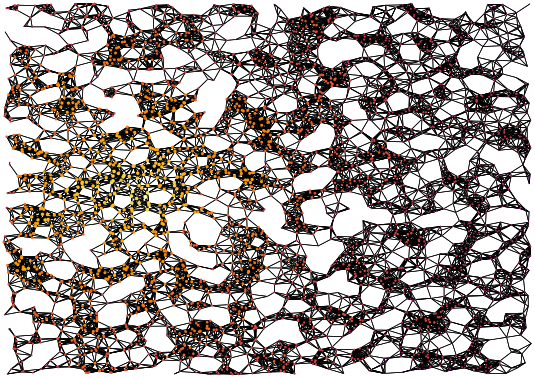

In [46]:
include("diffusions.jl")
include("utils.jl")
using DiffusionAlgorithms
using DiffusionTutorialUtilities

A,xy = utils.load_graph_and_coords("U3A");
P = utils.normout!(A)
n = size(P,1)
# chebyshev point set of alphas
N=15; alphas = [0.999,0.995,0.99,0.95,0.9,0.85,0.8,0.75,0.66,0.5,0.25,0.1]
@manipulate for alpha=alphas, seed=1:n
    @time x = DiffusionAlgorithms.single_seed_pagerank_power(P',alpha,seed)
    #utils.cgraphplot(A,xy,0.33*max(log(n*x),0.75),max(log(n*x),0),utils._inferno_data)
    utils.cgraphplot(A,xy,0.1*log(1/(max(minimum(x),1.e-12))*x),log(x+1.e-12),
        utils._inferno_data)
end   